In [1]:
import sys
import os
import SigVarGen as svr
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
domain = 'Arduino Board'
sig_len = 1000

t = np.linspace(0, 1, sig_len)
n_sinusoids = random.randint(20, 50)

drop = False

In [3]:
signal_range, interrupt_range = svr.generate_device_parameters(svr.EMBEDDED_DEVICE_RANGES, drop=drop, frequency_follows_amplitude=False, split_ratio=0.3)

In [4]:
amplitude_range = signal_range[domain]['amplitude']
frequency_range = signal_range[domain]['frequency']

In [5]:
max_mV = int(max(interrupt_range[domain]['amplitude']) * 500)
noise_data = svr.calculate_noise_power(10, max_mV, 100)
df_noise = pd.DataFrame(noise_data, columns=["σ (mV)", "σ (V)", "Noise_Power"])

In [6]:
df_noise[:5]

,σ (mV),σ (V),Noise_Power
0,10,0.01,0.0001
1,110,0.11,0.0121
2,210,0.21,0.0441
3,310,0.31,0.0961
4,410,0.41,0.1681


In [7]:
base_wave, sinusoids_params = svr.generate_signal(t, n_sinusoids, amplitude_range, frequency_range)

In [8]:
np.min(base_wave)

0.08595692079331638

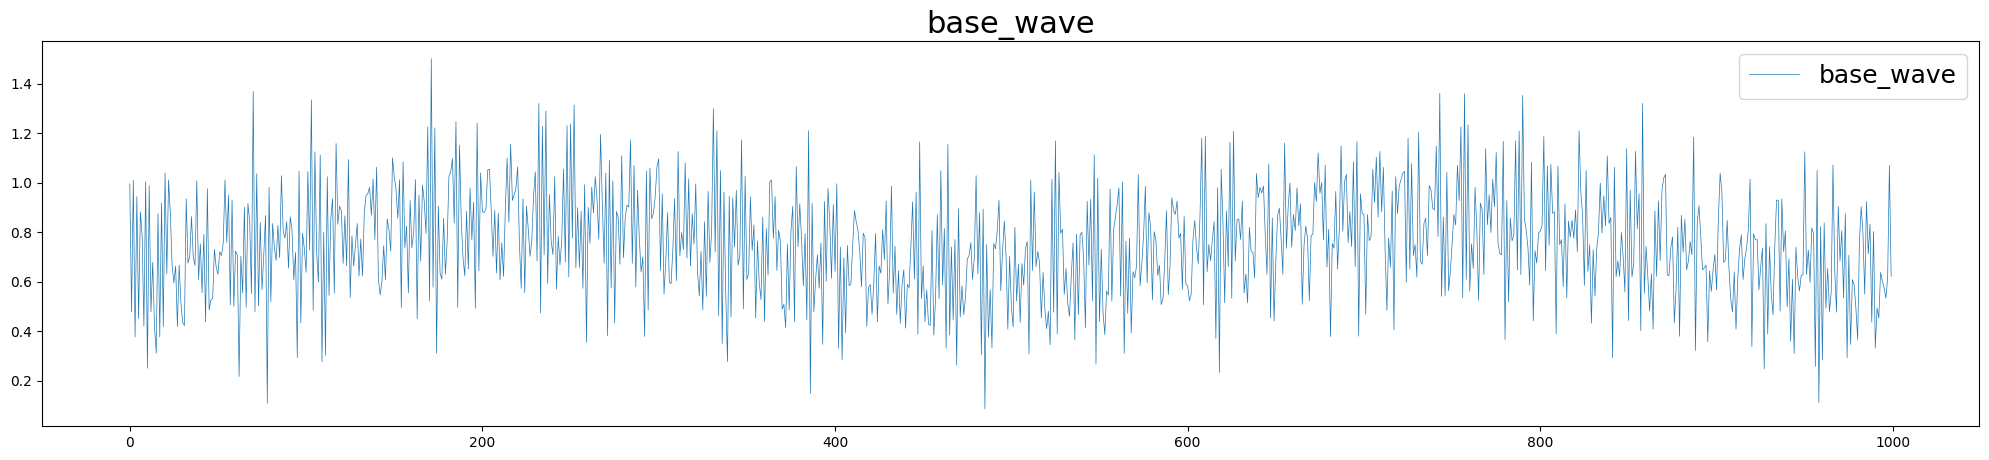

In [9]:
plt.figure(figsize=(25, 5))
plt.plot(range(len(base_wave)), base_wave, label='base_wave', linewidth=0.5)
plt.title(f"base_wave", fontsize=22)
plt.legend(fontsize=18)
plt.show()

In [10]:
wave, interrupt_params = svr.add_interrupt_with_params(t, base_wave.copy(), domain, signal_range, interrupt_range, 
                                            0, duration_ratio=0.08, disperse=False, drop=drop, complex_iter=2, shrink_complex=True)

(169, 249)


In [11]:
max(wave)

3.640721892203314

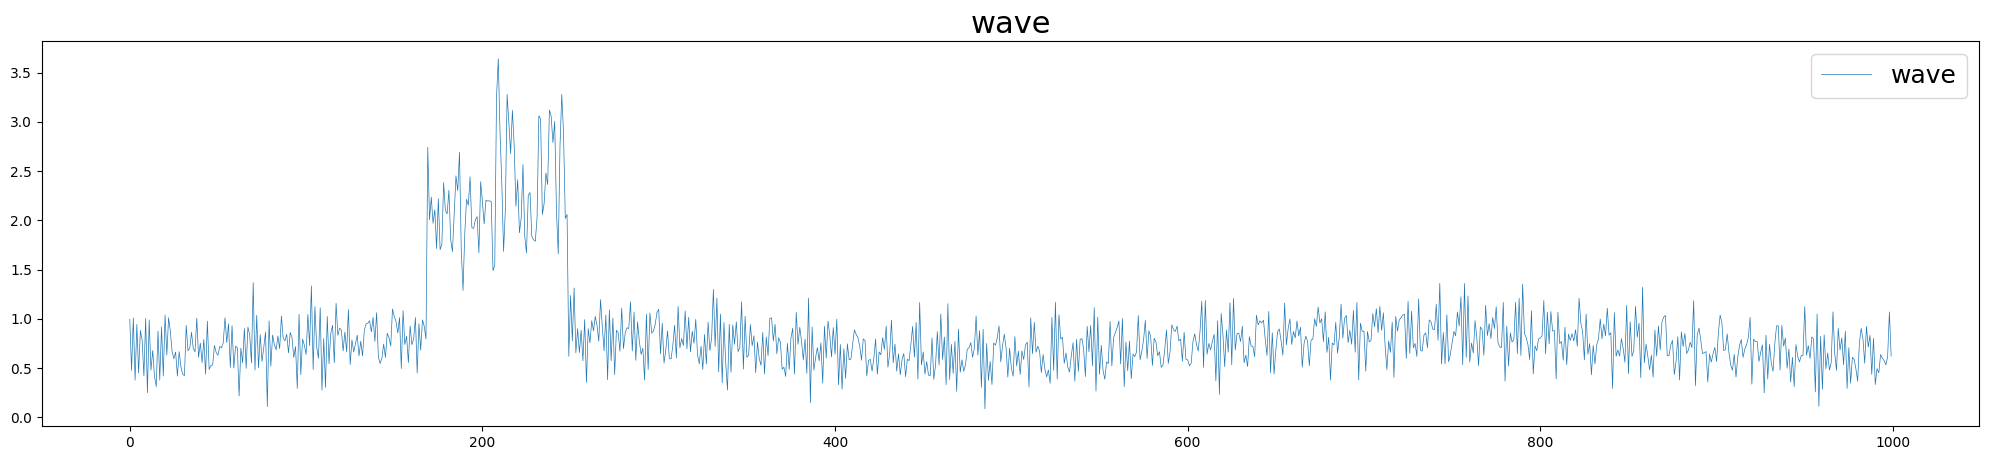

In [12]:
plt.figure(figsize=(25, 5))
plt.plot(range(len(wave)), wave, label='wave', linewidth=0.5)
plt.title(f"wave", fontsize=22)
plt.legend(fontsize=18)
plt.show()

In [13]:
domain = 'Cameras'
sig_len = 1000

t = np.linspace(0, 1, sig_len)
n_sinusoids = 10 #random.randint(20, 50)

drop = True

In [14]:
signal_range, interrupt_range = svr.generate_device_parameters(svr.EMBEDDED_DEVICE_RANGES, drop=drop, frequency_follows_amplitude=False, split_ratio=0.3)

amplitude_range = signal_range[domain]['amplitude']
frequency_range = signal_range[domain]['frequency']

frequency_subrange_key = 0 #random.choice(list(frequency_range.keys())) - if multiple frequency ranges per domain

base_frequency_range = (frequency_range[0], frequency_range[0] + (frequency_range[1] - frequency_range[0]) * 1)

In [22]:
max_mV = int(max(interrupt_range[domain]['amplitude']) * 500)
noise_data = svr.calculate_noise_power(10, max_mV, 100)
df_noise = pd.DataFrame(noise_data, columns=["σ (mV)", "σ (V)", "Noise_Power"])

In [23]:
base_wave, sinusoids_params = svr.generate_signal(t, n_sinusoids, amplitude_range, base_frequency_range)

In [24]:
np.mean(base_wave)

0.65

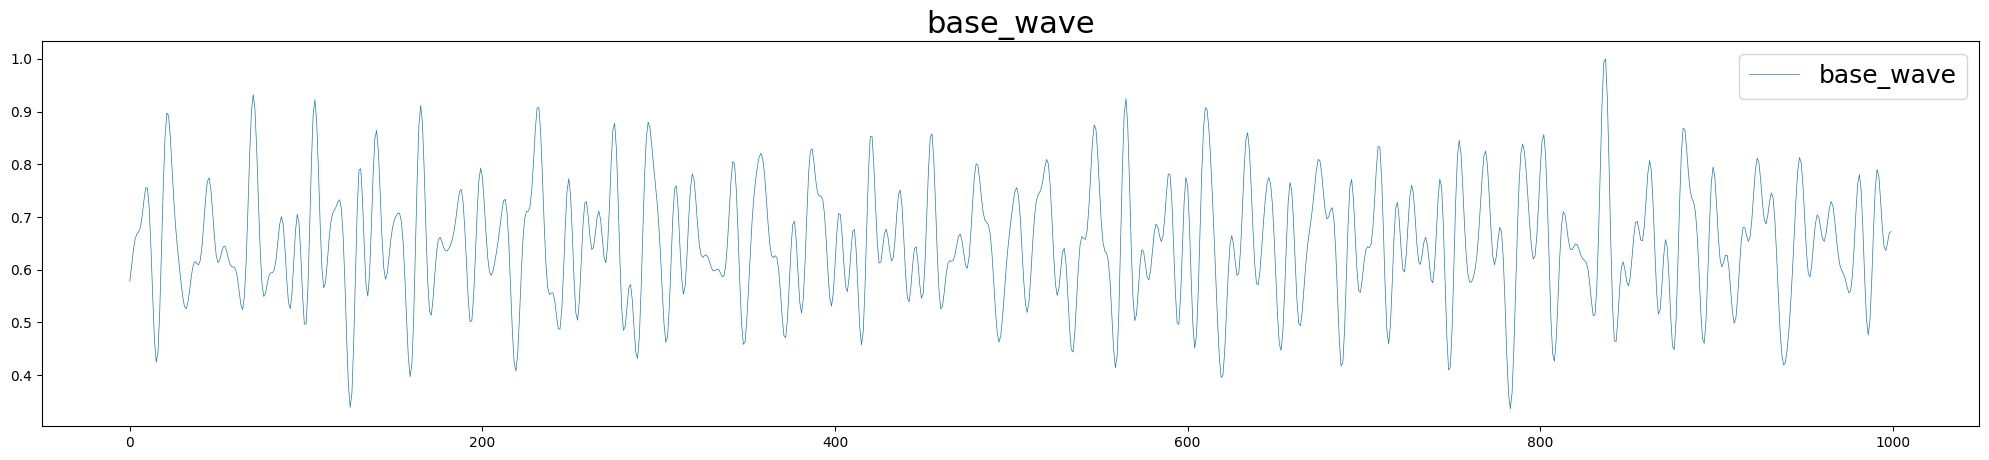

In [25]:
plt.figure(figsize=(25, 5))
plt.plot(range(len(base_wave)), base_wave, label='base_wave', linewidth=0.5)
plt.title(f"base_wave", fontsize=22)
plt.legend(fontsize=18)
plt.show()

In [26]:
wave, interrupt_params = svr.add_interrupt_with_params(t, base_wave.copy(), domain, signal_range, interrupt_range, 
                                            0, duration_ratio=0.08, disperse=True, drop=drop, complex_iter=0)

(499, 579)
(121, 170)


In [27]:
min(wave)

0.27699241976892774

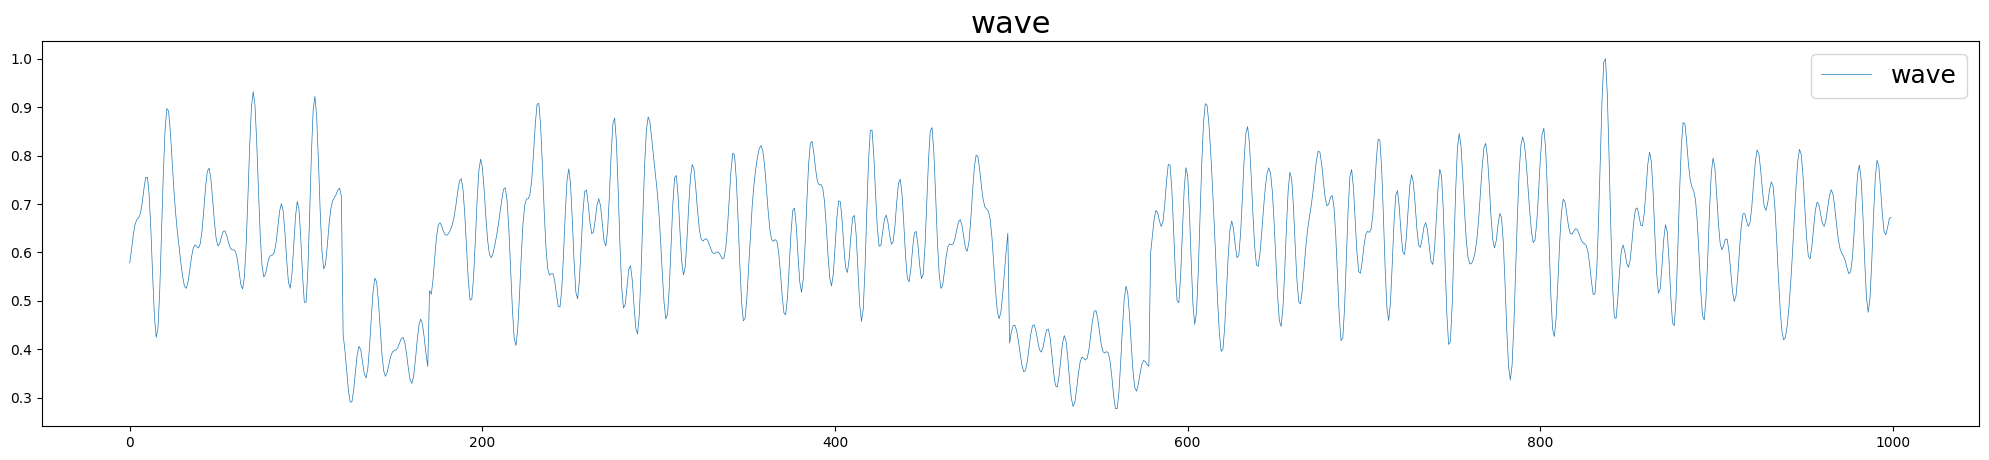

In [28]:
plt.figure(figsize=(25, 5))
plt.plot(range(len(wave)), wave, label='wave', linewidth=0.5)
plt.title(f"wave", fontsize=22)
plt.legend(fontsize=18)
plt.show()